# Prediction of server being hacked or not

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data= pd.read_csv('Train.csv')
test_data= pd.read_csv('Test.csv')

In [3]:
print(train_data.shape)
print(test_data.shape)

(23856, 18)
(15903, 17)


In [4]:
train_data.head(3)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1


In [5]:
test_data.head(3)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34


### Descriptive Statictics

In [6]:
train_data.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [7]:
test_data.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


### Data inspection

In [8]:
def inspect_data(Data):
    return pd.DataFrame({"Data Type":Data.dtypes,"No of Levels":Data.apply(lambda x: x.unique().shape[0],axis=0), "Levels":Data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(train_data)

,Data Type,No of Levels,Levels
INCIDENT_ID,object,23856,['CR_102659' 'CR_189752' 'CR_184637' ... 'CR_1...
DATE,object,9121,['04-JUL-04' '18-JUL-17' '15-MAR-17' ... '14-S...
X_1,int64,8,[0 1 5 7 3 4 2 6]
X_2,int64,52,[36 37 3 33 45 30 8 49 4 7 25 21 47 22 15 16 1...
X_3,int64,52,[34 37 2 32 45 35 7 49 4 8 25 23 48 22 14 15 1...
X_4,int64,10,[2 0 3 10 7 6 9 4 1 5]
X_5,int64,5,[1 0 5 3 2]
X_6,int64,19,[5 11 1 7 8 9 15 2 4 13 3 16 6 18 12 17 14 10 19]
X_7,int64,19,[6 17 0 1 3 8 10 7 2 18 5 12 4 13 16 11 14 15 9]
X_8,int64,24,[1 2 0 3 4 5 7 6 12 10 8 20 11 15 9 99 14 13 3...


In [9]:
inspect_data(test_data)

,Data Type,No of Levels,Levels
INCIDENT_ID,object,15903,['CR_195453' 'CR_103520' 'CR_196089' ... 'CR_1...
DATE,object,7939,['01-FEB-18' '05-MAR-04' '27-JAN-18' ... '07-M...
X_1,int64,8,[0 7 1 5 3 4 2 6]
X_2,int64,52,[30 44 34 3 7 47 33 21 36 16 4 26 5 49 6 9 25 ...
X_3,int64,52,[35 44 33 2 8 48 32 23 34 15 4 27 5 49 6 10 25...
X_4,int64,10,[7 1 3 2 4 0 6 9 10 5]
X_5,int64,5,[3 5 1 0 2]
X_6,int64,19,[6 7 2 9 4 5 1 3 16 15 11 18 8 12 14 17 13 19 10]
X_7,int64,19,[4 1 7 8 2 6 0 5 12 10 17 13 3 16 14 11 18 9 15]
X_8,int64,22,[0 4 3 1 2 12 5 6 40 7 8 20 11 10 25 9 18 30 1...


In [10]:
# converting 'MULTIPLE_OFFENSE' from integer to category 
train_data['MULTIPLE_OFFENSE']= train_data['MULTIPLE_OFFENSE'].astype('category')

### Checking for null values

In [11]:
train_data.isna().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [12]:
test_data.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [13]:
print(train_data['X_12'].unique())
print(test_data['X_12'].unique())

[ 1.  0.  3.  2.  6. 12.  4. nan  5. 11. 90. 20.  8. 16. 30. 10.  7. 50.
  9. 58. 14. 40. 15. 17.]
[nan  0.  1.  7.  2.  5.  3.  6.  4. 18.  9. 10.  8. 11. 20. 40. 14. 12.]


### Imputing NULL values

In [14]:
num_cols = train_data.select_dtypes(include='number').columns.tolist()
print(num_cols)

['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15']


In [15]:
# using K nearest neighbours imputation method, it will impute the missing value by approximating 'K' points 
# nearest to it based on other variables
from sklearn.impute import KNNImputer
imputer = KNNImputer()
train_data[num_cols] = imputer.fit_transform(train_data[num_cols])
test_data[num_cols] = imputer.fit_transform(test_data[num_cols])

## Exploratory Data Analysis 

### Distribution of the target variable

In [16]:
# only 5% of the total incidents are non-hacks
print(train_data['MULTIPLE_OFFENSE'].value_counts())

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64


Text(0, 0.5, 'Hacks count')

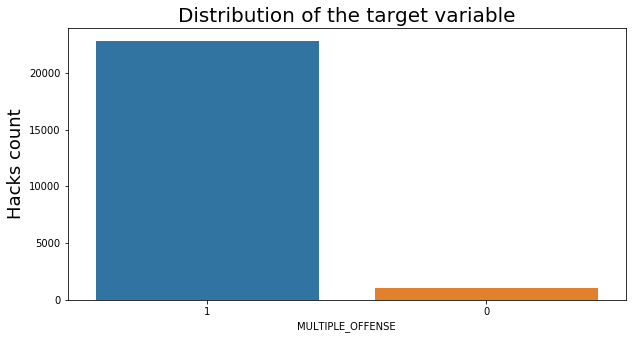

In [17]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = train_data.MULTIPLE_OFFENSE, \
              order = train_data.MULTIPLE_OFFENSE.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('Distribution of the target variable',fontsize=20)
plt.ylabel('Hacks count', fontsize = 18)

### Checking if 'DATE' variable is an important feature

In [18]:
# converting 'DATE' to datetime data type
from datetime import datetime
train_data['DATE'] = pd.to_datetime(train_data['DATE'])
test_data['DATE'] = pd.to_datetime(test_data['DATE'])

In [19]:
train_data.sort_values('DATE').head(3)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
19022,CR_1141,1991-01-01,0.0,22.0,22.0,7.0,3.0,8.0,3.0,7.0,2.0,2.0,0.0,2.0,72.0,142.0,34.0,1
13104,CR_2248,1991-01-02,0.0,33.0,32.0,2.0,1.0,7.0,1.0,1.0,6.0,1.0,249.0,1.0,72.0,142.0,34.0,1
1617,CR_3131,1991-01-03,1.0,36.0,34.0,2.0,1.0,15.0,10.0,0.0,5.0,1.0,174.0,0.0,92.0,93.0,0.0,1


In [20]:
train_data['DATE'].value_counts()

2001-09-12    22
2001-09-13    20
2001-09-17    17
2001-09-11    15
2001-09-15    15
2001-09-26    13
2001-09-16    12
2000-11-02    11
2001-09-20    11
2001-09-28    11
2001-09-18    11
2001-09-19    11
2005-08-14    11
2016-11-18    10
2006-06-30    10
2001-09-14    10
2001-05-17     9
2016-11-12     9
2001-10-22     9
2012-02-04     9
2000-07-13     9
2001-09-23     9
2006-04-18     9
2006-08-31     9
1992-05-01     9
2007-09-24     9
1999-05-25     8
1993-01-27     8
1993-10-05     8
1991-07-25     8
              ..
2011-08-14     1
1993-03-05     1
2003-04-30     1
2018-05-12     1
2013-04-06     1
2010-12-24     1
2010-01-16     1
1992-07-09     1
1999-07-25     1
1994-02-03     1
1992-06-25     1
2018-02-20     1
2014-12-17     1
1998-07-10     1
1991-05-06     1
2005-06-06     1
1996-02-06     1
2006-04-08     1
1999-05-08     1
2013-11-10     1
2010-01-20     1
2018-01-26     1
2005-08-07     1
2004-05-21     1
1994-04-13     1
2014-05-14     1
2001-05-13     1
1994-01-13    

In [21]:
# extracting year from the date to check hacks through out different years 
train_data['year'] = train_data['DATE'].dt.year
test_data['year'] = test_data['DATE'].dt.year 

In [22]:
# extracting month from the date to check hacks through out different months
train_data['month'] = train_data['DATE'].dt.month
test_data['month'] = test_data['DATE'].dt.month

In [23]:
# dropping 'DATE' column as year and month are extracted from it to check if they help in pattern recognition
# Hence Date would be of no use anymore
train_data.drop(["DATE"],axis=1,inplace=True)
test_data.drop(["DATE"],axis=1,inplace=True)

In [24]:
print(train_data['year'].nunique())
print(train_data['month'].nunique())

28
12


In [25]:
print(test_data['year'].nunique())
print(test_data['month'].nunique())

28
12


### Visualizing the column 'month'

Text(0.5, 0, 'Month')

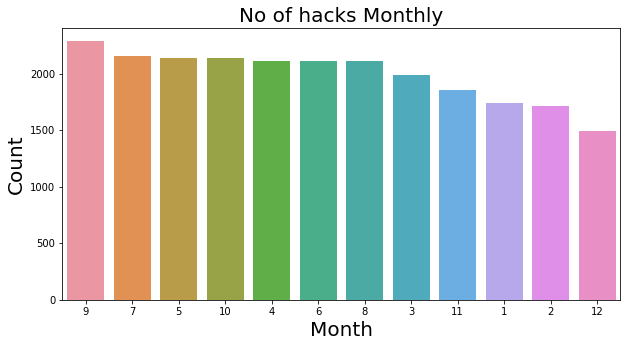

In [26]:
# there doesn't seem to be any pattern
# april to october had around equal no of incident logs, September having the most.
# december the least no of incident logs
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = train_data.month, \
              order = train_data.month.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of hacks Monthly', fontsize=20 )
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Month', fontsize = 20)

### Checking if 'month' has an effect on the target variable (MULTIPLE_OFFENSE).

In [27]:
df= train_data.groupby(['MULTIPLE_OFFENSE','month']).count().reset_index()
df.head(3)

,MULTIPLE_OFFENSE,month,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,year
0,0,1,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91
1,0,2,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
2,0,3,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85


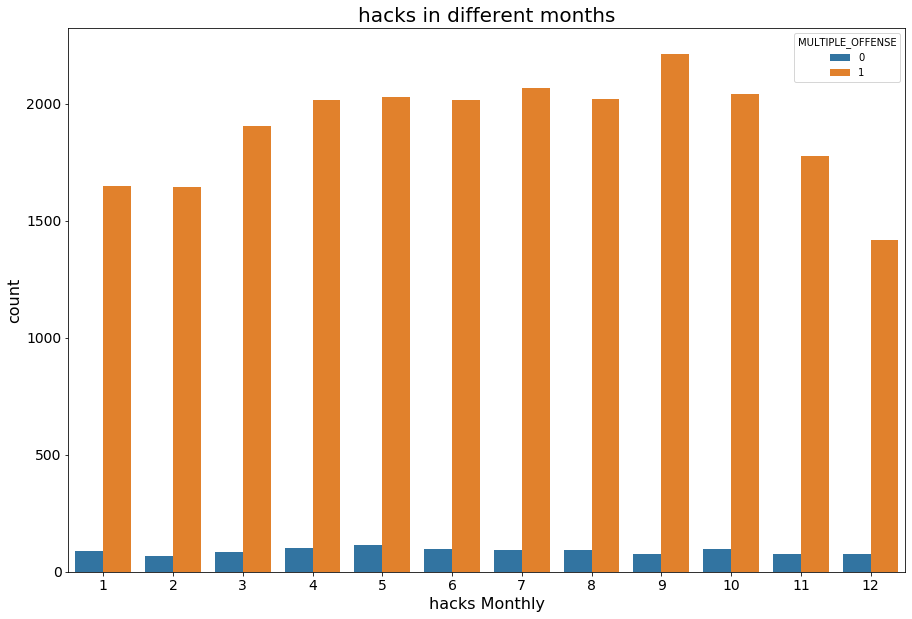

In [28]:
# there are almost equal no of no-hack incidents through out all the months.
# hack incidents are uneven 
%matplotlib inline
plt.figure(figsize=(15,10))
sns.barplot(x='month',y='INCIDENT_ID',hue='MULTIPLE_OFFENSE',data=df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('hacks Monthly', fontsize= 16)
plt.ylabel('count', fontsize= 16)
plt.title('hacks in different months', fontsize=20 )
plt.show()

### Visualizing the column 'year'

Text(0.5, 0, 'year')

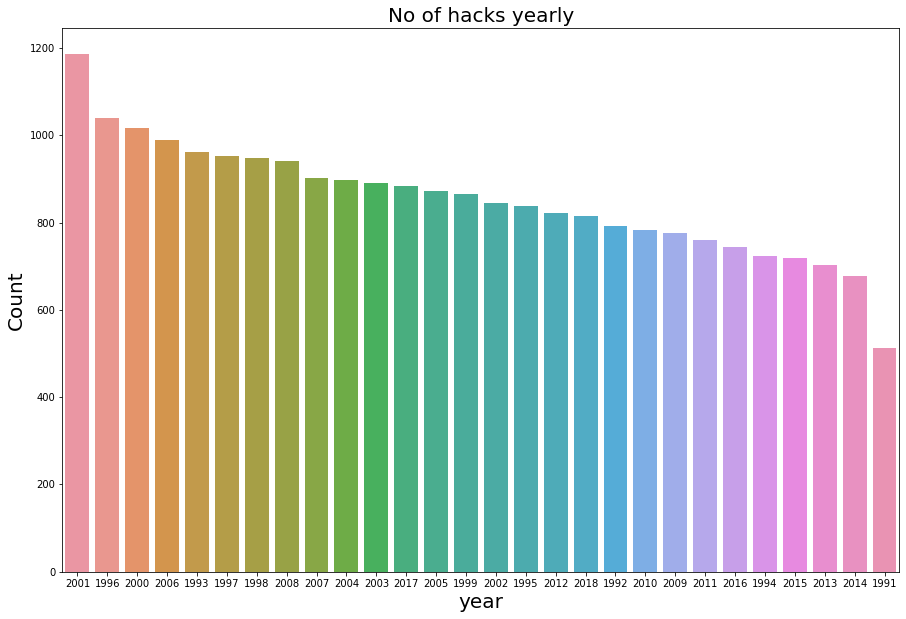

In [29]:
# noting that 2001 had more no of incidents and the least in 1991
%matplotlib inline
plt.figure(figsize=(15,10))
sns.countplot(x = train_data.year, \
              order = train_data.year.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('No of hacks yearly', fontsize=20 )
plt.ylabel('Count', fontsize = 20)
plt.xlabel('year', fontsize = 20)

### Checking if 'year' has an effect on the target variable (MULTIPLE_OFFENSE).

In [30]:
df1= train_data.groupby(['MULTIPLE_OFFENSE','year']).count().reset_index()
df1.head(3)

,MULTIPLE_OFFENSE,year,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,month
0,0,1991,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
1,0,1992,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
2,0,1993,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


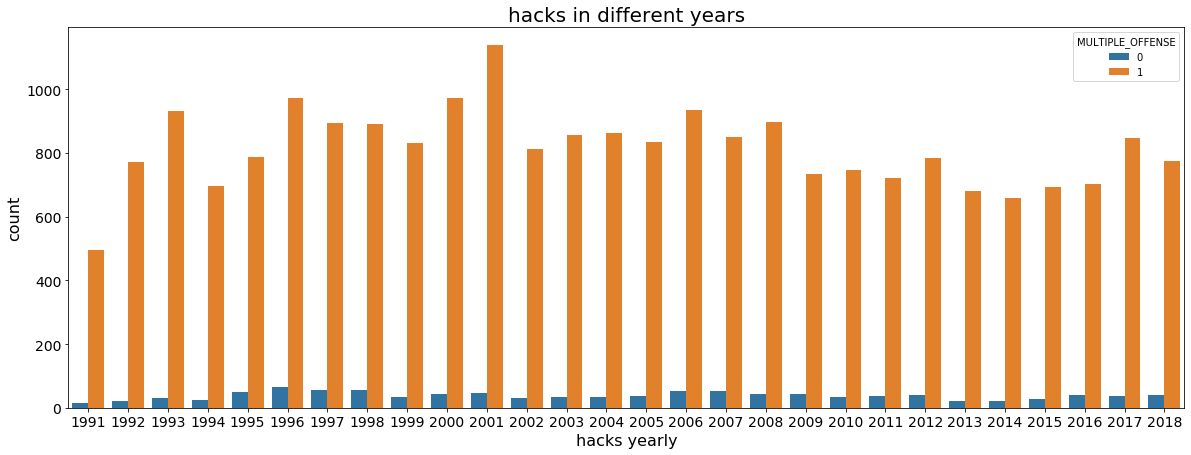

In [31]:
# there were more hacks in the 1st decade.
# a periodic increase in hack incidents all throught out the years
# non-hack inidents remian almost same
%matplotlib inline
plt.figure(figsize=(20,7))
sns.barplot(x='year',y='INCIDENT_ID',hue='MULTIPLE_OFFENSE',data=df1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('hacks yearly', fontsize= 16)
plt.ylabel('count', fontsize= 16)
plt.title('hacks in different years', fontsize=20 )
plt.show()

In [32]:
# dropping year and month columns as they do not seem to help in pattern recognition or prediction.
# They could be used to extract insights from visualizations.
train_data.drop(["year", "month"],axis=1,inplace=True)
test_data.drop(["year", "month"],axis=1,inplace=True)

### Correlation amoung numerical variables

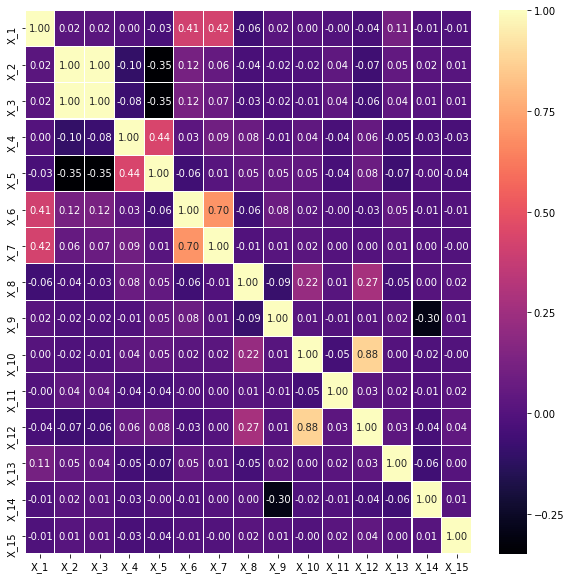

In [33]:
# correlation of 1 between 'X_2' and 'X_3'
# high correlation of 0.88 between 'X_10' and 'X_12'
# high correlation of 0.70 between 'X_6' and 'X_7'
# not dropping any of these variables with high correlations as they might be useful for pattern recognition when converted to
# category data types
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

### Converting data types

In [34]:
train_data.columns

Index(['INCIDENT_ID', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8',
       'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [35]:
# converting all the numeric columns to category
# considering them categorical because there could be a pattern in these variables and no of unique levels in each column is 
# way less then the total no of logs.
cat = train_data[['INCIDENT_ID','MULTIPLE_OFFENSE','X_1', 'X_4', 'X_5', 'X_9','X_6', 'X_7', 'X_8', 'X_10','X_12','X_15', 'X_3', 'X_2', 'X_11', 'X_13', 'X_14']]
for col in cat:
    train_data[col]= train_data[col].astype('category')

In [36]:
cat = test_data[['INCIDENT_ID', 'X_1', 'X_4', 'X_5', 'X_9', 'X_6', 'X_7', 'X_8', 'X_10','X_12','X_15', 'X_3', 'X_2', 'X_11', 'X_13', 'X_14']]
for col in cat:
    test_data[col]= test_data[col].astype('category')

### Decoupling

In [37]:
test_data.shape

(15903, 16)

In [38]:
# dropping 'INCIDENT_ID' as it won't be used in model building
train_data= train_data.drop(['INCIDENT_ID'] ,axis=1)
test_data1 = test_data.drop(['INCIDENT_ID'] ,axis=1)

In [39]:
y = train_data['MULTIPLE_OFFENSE']
print(y.shape)
X = train_data[train_data.columns.difference(['MULTIPLE_OFFENSE'])]  
print(X.shape)

(23856,)
(23856, 15)


### Dummyfication

In [40]:
X = pd.get_dummies(X)
X.shape

(23856, 531)

In [41]:
test_data1 = pd.get_dummies(test_data1)
test_data1.shape

(15903, 473)

In [42]:
# aligning train and test data for equal no. of columns
X, test_data1 = X.align(test_data1, join='outer', axis=1, fill_value=0)
print(X.shape)
print(test_data1.shape)

(23856, 577)
(15903, 577)


### Train validation split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3,stratify = y)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_valid',X_valid.shape)
print('y_valid',y_valid.shape)

X_train (16699, 577)
y_train (16699,)
X_valid (7157, 577)
y_valid (7157,)


## Model building

In [44]:
# computing sample weights
from sklearn.utils.class_weight import compute_sample_weight
sample_weights_train = compute_sample_weight(class_weight='balanced', y= y_train)
sample_weights_valid = compute_sample_weight(class_weight='balanced', y= y_valid)

In [45]:
# defined metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
def train_metrics(y_true, y_pred, sample_weight = sample_weights_train):
    print("Train")
    print('accuracy:',accuracy_score(y_true, y_pred, sample_weight = sample_weights_train))
    print('recall:',recall_score(y_true, y_pred, sample_weight = sample_weights_train))
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    
def test_metrics(y_true, y_pred, sample_weight = sample_weights_valid):
    print("Validation")
    print('accuracy:',accuracy_score(y_true, y_pred, sample_weight = sample_weights_valid))
    print('recall:',recall_score(y_true, y_pred, sample_weight = sample_weights_valid))
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

### Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression(class_weight='balanced') #penalty='l1')
model_log = lr.fit(X_train, y_train)
train_pred = model_log.predict(X_train)
test_pred = model_log.predict(X_valid)

In [48]:
train_metrics(y_train,train_pred, sample_weight = sample_weights_train)
test_metrics(y_valid,test_pred, sample_weight = sample_weights_valid)

Train
accuracy: 0.9995925020374898
recall: 0.99918500407498
[[  748     0]
 [   13 15938]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       748
           1       1.00      1.00      1.00     15951

    accuracy                           1.00     16699
   macro avg       0.99      1.00      1.00     16699
weighted avg       1.00      1.00      1.00     16699

Validation
accuracy: 0.999049290624543
recall: 0.9980985812490858
[[ 320    0]
 [  13 6824]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       320
           1       1.00      1.00      1.00      6837

    accuracy                           1.00      7157
   macro avg       0.98      1.00      0.99      7157
weighted avg       1.00      1.00      1.00      7157



### Decision trees

In [49]:
from sklearn import tree
model_dec = tree.DecisionTreeClassifier(class_weight= 'balanced', max_depth=10)   ## Instantiating DecisionTree-Classifier
model_dec.fit(X_train, y_train)          

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
train_pred1 = model_dec.predict(X_train)
test_pred1 = model_dec.predict(X_valid)

In [51]:
train_metrics(y_train,train_pred1)
test_metrics(y_valid,test_pred1)

Train
accuracy: 0.9992163500720961
recall: 0.9984327001441923
[[  748     0]
 [   25 15926]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       748
           1       1.00      1.00      1.00     15951

    accuracy                           1.00     16699
   macro avg       0.98      1.00      0.99     16699
weighted avg       1.00      1.00      1.00     16699

Validation
accuracy: 0.9992686850958022
recall: 0.9985373701916044
[[ 320    0]
 [  10 6827]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       320
           1       1.00      1.00      1.00      6837

    accuracy                           1.00      7157
   macro avg       0.98      1.00      0.99      7157
weighted avg       1.00      1.00      1.00      7157



### Predicting on test

In [52]:
test_data1.shape

(15903, 577)

In [53]:
test_predictions = model_dec.predict(test_data1)

In [54]:
test_data.shape

(15903, 16)

In [55]:
final = pd.DataFrame({'INCIDENT_ID': test_data['INCIDENT_ID'], 'MULTIPLE_OFFENSE': test_predictions})
final.MULTIPLE_OFFENSE = final.MULTIPLE_OFFENSE.astype('int8')
final.to_csv('final9.csv',index=False) 

### Decision Trees with tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
dt = tree.DecisionTreeClassifier(class_weight= 'balanced') 
param_grid = {'criterion':['gini','entropy'],
             'max_leaf_nodes': np.arange(5,10,1),
             'min_samples_leaf':np.arange(1,5,1), 
             'min_samples_split': np.arange(0.001,0.1,0.01),
             'max_depth':np.arange(5,15,1),
             'min_weight_fraction_leaf':np.arange(0.01,0.25,0.005)}
rsearch = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=500)
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_estimator_)

0.9734714578031717
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4,
                       min_samples_split=0.05099999999999999,
                       min_weight_fraction_leaf=0.01, presort='deprecated',
                       random_state=None, splitter='best')


In [57]:
bst_dt=rsearch.best_estimator_

In [58]:
train_pred2 = bst_dt.predict(X_train)
test_pred2 = bst_dt.predict(X_valid)

In [59]:
train_metrics(y_train,train_pred2)
test_metrics(y_valid,test_pred2)

Train
accuracy: 0.9810168976715791
recall: 0.972728982508945
[[  740     8]
 [  435 15516]]
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       748
           1       1.00      0.97      0.99     15951

    accuracy                           0.97     16699
   macro avg       0.81      0.98      0.88     16699
weighted avg       0.98      0.97      0.98     16699

Validation
accuracy: 0.9843231223489834
recall: 0.9717712446979653
[[ 319    1]
 [ 193 6644]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       320
           1       1.00      0.97      0.99      6837

    accuracy                           0.97      7157
   macro avg       0.81      0.98      0.88      7157
weighted avg       0.98      0.97      0.98      7157



### Random forest 

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight= 'balanced',max_depth=10,max_features='sqrt') 
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
rfcpred_test=rfc.predict(X_valid)
rfcpred_train=rfc.predict(X_train)

In [62]:
train_metrics(y_train,rfcpred_train)
test_metrics(y_valid,rfcpred_test)

Train
accuracy: 0.9799597245843471
recall: 0.9612563475644322
[[  747     1]
 [  618 15333]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       748
           1       1.00      0.96      0.98     15951

    accuracy                           0.96     16699
   macro avg       0.77      0.98      0.84     16699
weighted avg       0.98      0.96      0.97     16699

Validation
accuracy: 0.9785457346058212
recall: 0.9602164692116402
[[ 319    1]
 [ 272 6565]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       320
           1       1.00      0.96      0.98      6837

    accuracy                           0.96      7157
   macro avg       0.77      0.98      0.84      7157
weighted avg       0.98      0.96      0.97      7157



### XGBoost

In [64]:
import xgboost as xgb
from xgboost import XGBClassifier
xg_cla = xgb.XGBClassifier(max_depth= 7,  # the maximum depth of each tree
    min_child_weight= 4,
    subsample= 0.6, 
    max_delta_step= 3,
    gamma = 0.6,
    learning_rate = 0.01,  # the training step for each iteration
    reg_alpha = 1,
    silent = 1,  # logging mode - quiet
    objective= 'binary:logistic' , n_estimators = 10)

In [65]:
xg_cla.fit(X_train,y_train, sample_weight= sample_weights_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0.6, learning_rate=0.01,
              max_delta_step=3, max_depth=7, min_child_weight=4, missing=None,
              n_estimators=10, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
              subsample=0.6)

In [66]:
preds_train= xg_cla.predict(X_train)
preds_valid = xg_cla.predict(X_valid)

In [67]:
train_metrics(y_train,preds_train)
test_metrics(y_valid,preds_valid)

Train
accuracy: 0.9956742523979688
recall: 0.9913485047959412
[[  748     0]
 [  138 15813]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       748
           1       1.00      0.99      1.00     15951

    accuracy                           0.99     16699
   macro avg       0.92      1.00      0.96     16699
weighted avg       0.99      0.99      0.99     16699

Validation
accuracy: 0.9961971624981717
recall: 0.992394324996343
[[ 320    0]
 [  52 6785]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       320
           1       1.00      0.99      1.00      6837

    accuracy                           0.99      7157
   macro avg       0.93      1.00      0.96      7157
weighted avg       0.99      0.99      0.99      7157



### ANN

In [68]:
from keras.models import Sequential 
from keras.layers import Dense

C:\Users\Tejasvi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [69]:
model = Sequential() # This initializes a sequential model to which we can keep adding layers.
model.add(Dense(200, kernel_initializer='random_uniform', 
                input_dim = 577, activation='relu')) # Add a dense layer 
model.add(Dense(2, kernel_initializer='uniform', 
                activation='sigmoid')) # Add output layer

W0620 16:52:31.096836  8540 deprecation_wrapper.py:119] From C:\Users\Tejasvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 16:52:31.645918  8540 deprecation_wrapper.py:119] From C:\Users\Tejasvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 16:52:31.760550  8540 deprecation_wrapper.py:119] From C:\Users\Tejasvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [70]:
from keras.optimizers import Adam, SGD
#from keras.callbacks import EarlyStopping

adam = Adam(lr=0.0001)
sgd = SGD(lr=0.0011, decay=1e-6, momentum=0.9, nesterov=True)
#callbacks
#earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model.compile(loss='binary_crossentropy', # CrossEntropy is the loss function. 
              optimizer=adam,            # Mention the optimizer
              metrics=['accuracy'])            # Mention the metric to be printed while training

W0620 16:52:31.994018  8540 deprecation_wrapper.py:119] From C:\Users\Tejasvi\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0620 16:52:32.009748  8540 deprecation_wrapper.py:119] From C:\Users\Tejasvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0620 16:52:32.021392  8540 deprecation.py:323] From C:\Users\Tejasvi\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [72]:
# 'to_categorical' converts the class lebels to one-hot vectors. One-hot vector is nothing but dummifying in R.
from keras.utils import to_categorical
y_train1 = to_categorical(y_train)
y_valid1 = to_categorical(y_valid)
print('y_train1 shape: {}'.format(y_train1.shape))

y_train1 shape: (16699, 2)


In [73]:
nb_epochs = 60
# training the MLP model
history = model.fit(X_train, y_train1, epochs=nb_epochs, batch_size=64, class_weight='balanced') 

W0620 16:52:32.938442  8540 deprecation_wrapper.py:119] From C:\Users\Tejasvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/60
16699/16699 [==============================] - 3s 199us/step - loss: 0.4159 - acc: 0.9510
Epoch 2/60
16699/16699 [==============================] - 2s 93us/step - loss: 0.1587 - acc: 0.9552
Epoch 3/60
16699/16699 [==============================] - 1s 82us/step - loss: 0.1314 - acc: 0.9552
Epoch 4/60
16699/16699 [==============================] - 1s 88us/step - loss: 0.1073 - acc: 0.9555
Epoch 5/60
16699/16699 [==============================] - 1s 89us/step - loss: 0.0820 - acc: 0.9604
Epoch 6/60
16699/16699 [==============================] - 1s 87us/step - loss: 0.0608 - acc: 0.9741
Epoch 7/60
16699/16699 [==============================] - 1s 82us/step - loss: 0.0452 - acc: 0.9841
Epoch 8/60
16699/16699 [==============================] - 1s 81us/step - loss: 0.0342 - acc: 0.9893
Epoch 9/60
16699/16699 [==============================] - 1s 79us/step - loss: 0.0264 - acc: 0.9945
Epoch 10/60
16699/16699 [==============================] - 1s 76us/step - loss: 0.0208 - acc: 0.996

In [74]:
ann_train= model.predict_classes(X_train)
ann_test= model.predict_classes(X_valid)

In [75]:
np.unique(ann_train)

array([0, 1], dtype=int64)

In [76]:
train_metrics(y_train,ann_train)
test_metrics(y_valid,ann_test)

Train
accuracy: 1.0
recall: 1.0
[[  748     0]
 [    0 15951]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       748
           1       1.00      1.00      1.00     15951

    accuracy                           1.00     16699
   macro avg       1.00      1.00      1.00     16699
weighted avg       1.00      1.00      1.00     16699

Validation
accuracy: 0.9889893685095802
recall: 0.9998537370191605
[[ 313    7]
 [   1 6836]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       320
           1       1.00      1.00      1.00      6837

    accuracy                           1.00      7157
   macro avg       1.00      0.99      0.99      7157
weighted avg       1.00      1.00      1.00      7157



In [77]:
test_predictions = model.predict_classes(test_data1)

In [78]:
final1 = pd.DataFrame({'INCIDENT_ID': test_data['INCIDENT_ID'], 'MULTIPLE_OFFENSE': test_predictions})
final1.MULTIPLE_OFFENSE = final1.MULTIPLE_OFFENSE.astype('int8')
final1.to_csv('final8.csv',index=False)

## Feature Importance  

Text(0.5, 0, 'Relative Importance')

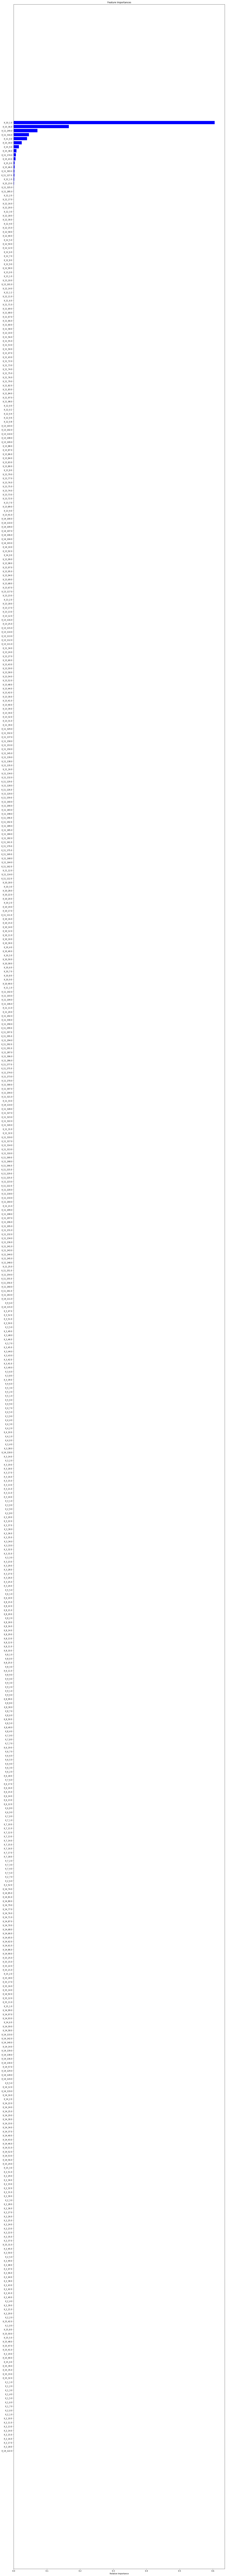

In [79]:
# from decision trees as it showed the best results 

plt.figure(figsize=(20,250))
features=X_train.columns
importances = model_dec.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Patterns using Decision trees

In [80]:
# Decision trees are easy to interpret and understand
# Decision tree flowchart represents decision rules for easy decision making

from sklearn import tree
model_pat = tree.DecisionTreeClassifier(class_weight= 'balanced', max_depth=8)   ## Instantiating DecisionTree-Classifier
model_pat.fit(X, y)  
print(model_pat.score(X, y))

0.9957662642521797


In [81]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(model_pat, 
                                feature_names=X.columns,  
                                class_names=['0','1'],  
                                filled=True, rounded=True, 
                                special_characters=True)  

In [82]:
graph = graphviz.Source(dot_data)  
graph.format = 'png'
graph.render("dt_patterns",view=True) 

'dt_patterns.png'

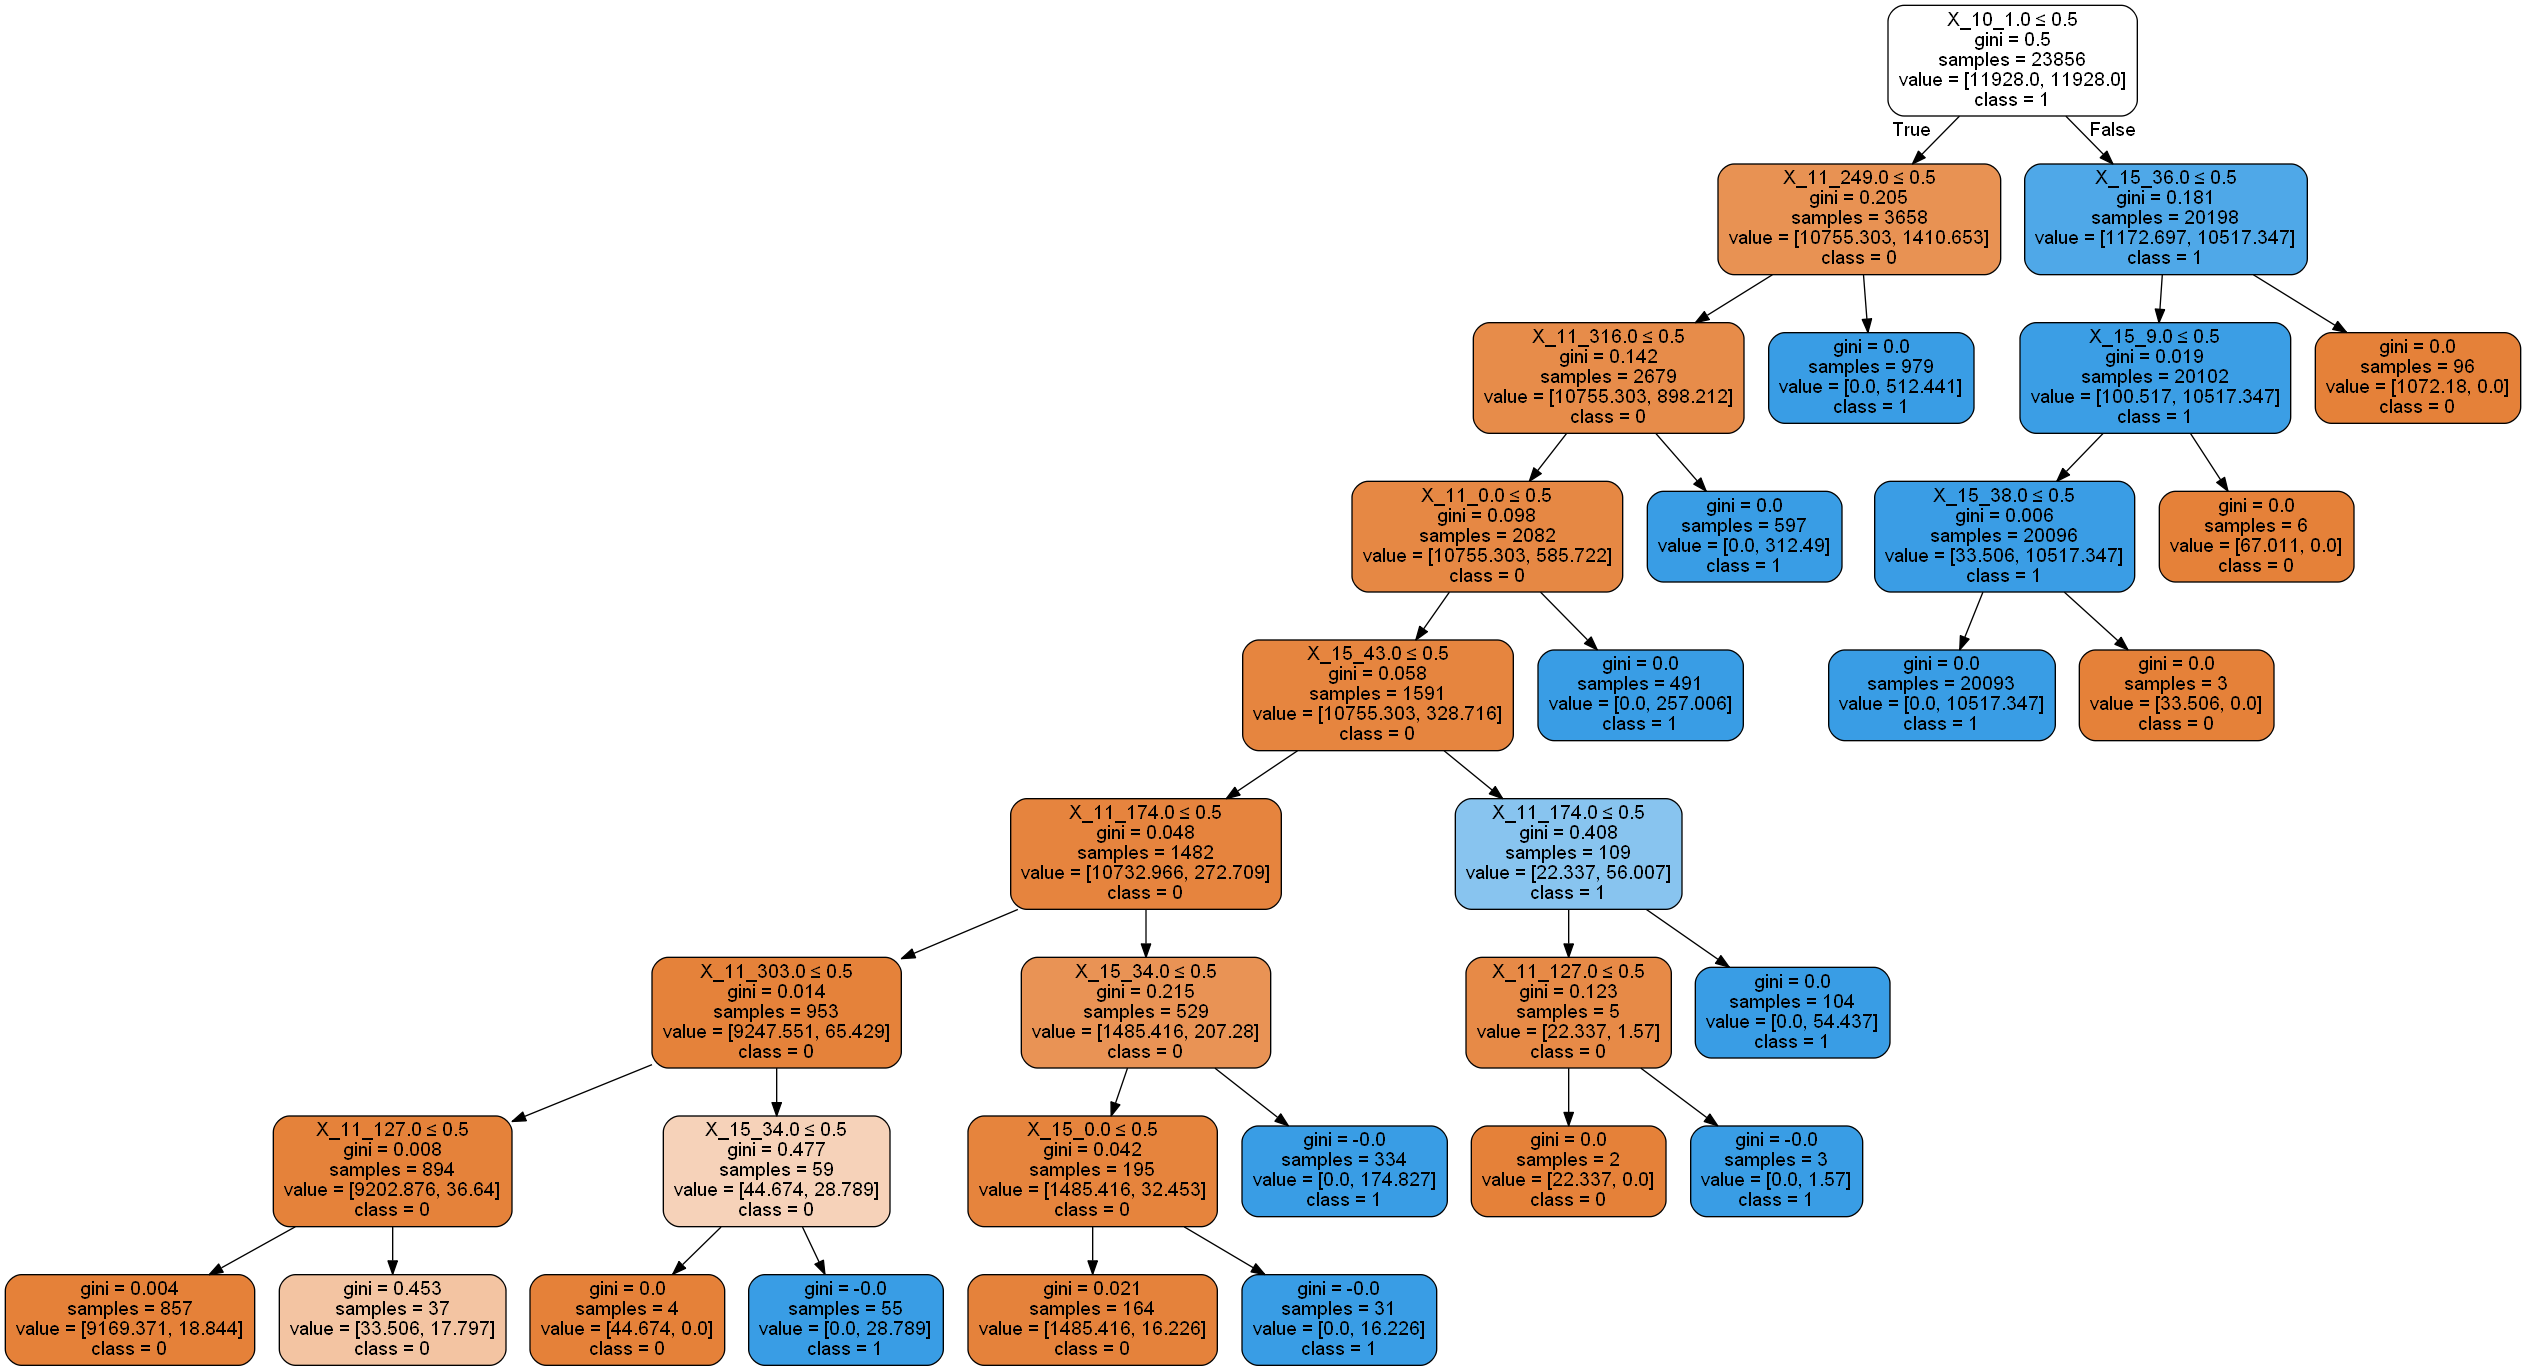

In [83]:
from IPython.display import Image
Image(filename='dt_patterns.png') 

## Key observations:
#### The root node is X_10, hence an important variable for recurssive partitioning.
#### Important features for finding out the patterns in predicting a hack incident are X_10, X_15 and X_11 as per the feature importance graph and DT flow chart.
### Some of the conditional rules from the DT flow chart are as follows:
#### X_15_38.0 <= 0.5 == class 1 
#### X_11_127.0 <= 0.5 == class 0
#### X_11_249.0 >= 0.5 == class  1